# Artificial Neural Network

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os

time: 915 µs (started: 2024-01-10 17:20:11 +00:00)


In [31]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.03 s (started: 2024-01-10 17:20:11 +00:00)


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 4.26 s (started: 2024-01-10 17:20:17 +00:00)


In [33]:
# folder_path = '/content/drive/MyDrive/CSE_4554_ML_PROJECT/datasets/'

# csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# datasets = []

# for csv_file in csv_files:
#     file_path = os.path.join(folder_path, csv_file)
#     df = pd.read_csv(file_path)
#     datasets.append(df)

# combined_dataset = pd.concat(datasets, axis=0, ignore_index=True)

# combined_dataset.to_csv('/content/drive/MyDrive/CSE_4554_ML_PROJECT/final_56_dataset.csv', index=False)


time: 320 µs (started: 2024-01-10 17:20:21 +00:00)


In [34]:
training_df = pd.read_csv('/content/drive/MyDrive/CSE_4554_ML_PROJECT/train_dataset.csv')

time: 2.86 s (started: 2024-01-10 17:20:21 +00:00)


In [35]:
training_df.head()

,Unnamed: 0,loc,lloc,sloc,comments,multi,blank,single_comments,Cyclomatic Complexity,mi,...,calculated_length,volume,difficulty,effort,time,bugs,number of methods,number of attributes,number of branches,Bug Present
0,0,12,6,5,4,2,1,4,1,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.0,0.0,0
1,1,143,112,115,7,8,18,2,53,42.684011,...,302.189566,670.621308,10.456522,7012.366282,389.575905,0.223540,1.0,63.0,34.0,0
2,2,6,5,5,0,0,1,0,4,79.473337,...,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585,1.0,6.0,1.0,0
3,3,10,6,9,0,0,0,1,1,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.0,0.0,0
4,4,2,2,2,0,0,0,0,1,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4.0,0.0,0


time: 21.2 ms (started: 2024-01-10 17:20:24 +00:00)


In [36]:
training_df = training_df.drop(['Unnamed: 0'], axis=1)

time: 72.1 ms (started: 2024-01-10 17:20:24 +00:00)


In [37]:
training_df.head()

,loc,lloc,sloc,comments,multi,blank,single_comments,Cyclomatic Complexity,mi,h1,...,calculated_length,volume,difficulty,effort,time,bugs,number of methods,number of attributes,number of branches,Bug Present
0,12,6,5,4,2,1,4,1,100.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.0,0.0,0
1,143,112,115,7,8,18,2,53,42.684011,13,...,302.189566,670.621308,10.456522,7012.366282,389.575905,0.223540,1.0,63.0,34.0,0
2,6,5,5,0,0,1,0,4,79.473337,1,...,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585,1.0,6.0,1.0,0
3,10,6,9,0,0,0,1,1,100.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.0,0.0,0
4,2,2,2,0,0,0,0,1,100.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4.0,0.0,0


time: 18 ms (started: 2024-01-10 17:20:24 +00:00)


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.nn.init as init

time: 505 µs (started: 2024-01-10 17:20:24 +00:00)


In [39]:
X = training_df.drop(['Bug Present'], axis=1).values
y = training_df['Bug Present'].values

time: 141 ms (started: 2024-01-10 17:20:24 +00:00)


In [40]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y

time: 482 µs (started: 2024-01-10 17:20:24 +00:00)


In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

time: 341 ms (started: 2024-01-10 17:20:24 +00:00)


In [42]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
# X_val_tensor = torch.FloatTensor(X_val)
# y_val_tensor = torch.FloatTensor(y_val)

time: 72.6 ms (started: 2024-01-10 17:20:24 +00:00)


In [43]:
# import torch.nn as nn
# import torch.nn.init as init

# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size):
#         super(NeuralNetwork, self).__init__()

#         # Define hidden layers
#         self.fc1 = nn.Linear(input_size, 256)
#         self.relu1 = nn.ReLU()
#         self.bn1 = nn.BatchNorm1d(256)
#         self.dropout1 = nn.Dropout(0.5)

#         self.fc2 = nn.Linear(256, 128)
#         self.relu2 = nn.ReLU()
#         self.bn2 = nn.BatchNorm1d(128)
#         self.dropout2 = nn.Dropout(0.5)

#         self.fc3 = nn.Linear(128, 64)
#         self.relu3 = nn.ReLU()
#         self.bn3 = nn.BatchNorm1d(64)
#         self.dropout3 = nn.Dropout(0.5)

#         self.fc4 = nn.Linear(64, 32)
#         self.relu4 = nn.ReLU()
#         self.bn4 = nn.BatchNorm1d(32)
#         self.dropout4 = nn.Dropout(0.5)

#         self.fc5 = nn.Linear(32, 1)
#         self.sigmoid = nn.Sigmoid()

#         # Initialize weights
#         self.init_weights()

#     def init_weights(self):
#         for m in self.modules():
#             if isinstance(m, nn.Linear):
#                 init.xavier_uniform_(m.weight)
#                 if m.bias is not None:
#                     init.constant_(m.bias, 0)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu1(x)
#         x = self.bn1(x)
#         x = self.dropout1(x)

#         x = self.fc2(x)
#         x = self.relu2(x)
#         x = self.bn2(x)
#         x = self.dropout2(x)

#         x = self.fc3(x)
#         x = self.relu3(x)
#         x = self.bn3(x)
#         x = self.dropout3(x)

#         x = self.fc4(x)
#         x = self.relu4(x)
#         x = self.bn4(x)
#         x = self.dropout4(x)

#         x = self.fc5(x)
#         x = self.sigmoid(x)

#         return x



class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.bn1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.bn2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.sigmoid(x)

        return x


# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, 5)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(5, 2)
#         self.relu = nn.ReLU()
#         self.fc3 = nn.Linear(2, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         x = self.relu(x)
#         x = self.fc3(x)
#         x = self.sigmoid(x)
#         return x


time: 1.48 ms (started: 2024-01-10 17:20:24 +00:00)


In [44]:
input_size = X_train_tensor.shape[1]
model = NeuralNetwork(input_size)

time: 2.67 ms (started: 2024-01-10 17:20:24 +00:00)


In [45]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

time: 1.64 ms (started: 2024-01-10 17:20:24 +00:00)


In [46]:
num_epochs = 5
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/5], Loss: 0.9072
Epoch [4/5], Loss: 0.8777
time: 47.7 s (started: 2024-01-10 17:20:24 +00:00)


In [47]:
# with torch.no_grad():
#     model.eval()
#     predictions = model(X_val_tensor)
#     predictions = (predictions > 0.5).float()
#     accuracy = (predictions == y_val_tensor.view(-1, 1)).float().mean().item()
#     print(f'Validation Accuracy: {accuracy:.4f}')

time: 650 µs (started: 2024-01-10 17:21:12 +00:00)


In [48]:
test_set=pd.read_csv(f'/content/drive/MyDrive/CSE_4554_ML_PROJECT/test_set.csv')
test_set=test_set.drop(['filename','Unnamed: 0'],axis=1)
X_test,y_test=test_set.drop(['Bug Present'],axis=1).values,test_set['Bug Present'].values

time: 68.1 ms (started: 2024-01-10 17:21:12 +00:00)


In [49]:
X_test = scaler.transform(X_test)

time: 3.35 ms (started: 2024-01-10 17:21:12 +00:00)


In [50]:
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

time: 1.3 ms (started: 2024-01-10 17:21:12 +00:00)


In [51]:
with torch.no_grad():
    model.eval()
    predictions_test = model(X_test_tensor)
    predictions_test = (predictions_test > 0.5).float()

    accuracy_test = (predictions_test == y_test_tensor.view(-1, 1)).float().mean().item()
    print(f'Test Accuracy: {accuracy_test:.4f}')

Test Accuracy: 0.6153
time: 16.6 ms (started: 2024-01-10 17:21:12 +00:00)


In [52]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

time: 373 µs (started: 2024-01-10 17:21:12 +00:00)


In [53]:
# conf_matrix_val = confusion_matrix(y_val_tensor.numpy(), predictions.numpy().flatten())
# print("Confusion Matrix (Validation Set):")
# print(conf_matrix_val)

time: 1.39 ms (started: 2024-01-10 17:21:12 +00:00)


In [54]:
# fpr_val, tpr_val, thresholds_val = roc_curve(y_val_tensor.numpy(), predictions.numpy().flatten())
# roc_auc_val = auc(fpr_val, tpr_val)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'AUC = {roc_auc_val:.2f}')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (Validation Set)')
# plt.legend(loc='lower right')
# plt.show()

# print(f'AUC Score (Validation Set): {roc_auc_val:.4f}')

time: 224 µs (started: 2024-01-10 17:21:12 +00:00)


In [55]:
# precision_val = precision_score(y_val_tensor.numpy(), predictions.numpy().flatten())
# recall_val = recall_score(y_val_tensor.numpy(), predictions.numpy().flatten())
# f1_val = f1_score(y_val_tensor.numpy(), predictions.numpy().flatten())

# print(f'Precision (Validation Set): {precision_val:.4f}')
# print(f'Recall (Validation Set): {recall_val:.4f}')
# print(f'F1 Score (Validation Set): {f1_val:.4f}')

time: 244 µs (started: 2024-01-10 17:21:12 +00:00)


In [56]:
threshold = 0.5
binary_predictions_test = (predictions_test > threshold).float()

conf_matrix_test = confusion_matrix(y_test_tensor.numpy(), binary_predictions_test.numpy().flatten())
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_tensor.numpy(), predictions_test.numpy().flatten())
roc_auc_test = auc(fpr_test, tpr_test)

print(f'AUC Score (Test Set): {roc_auc_test:.4f}')

Confusion Matrix (Test Set):
[[5874 3528]
 [3705 5697]]
AUC Score (Test Set): 0.6153
time: 30.8 ms (started: 2024-01-10 17:21:12 +00:00)


In [57]:

precision_test = precision_score(y_test_tensor.numpy(), binary_predictions_test.numpy().flatten())
recall_test = recall_score(y_test_tensor.numpy(), binary_predictions_test.numpy().flatten())
f1_test = f1_score(y_test_tensor.numpy(), binary_predictions_test.numpy().flatten())

print(f'Precision (Test Set): {precision_test:.4f}')
print(f'Recall (Test Set): {recall_test:.4f}')
print(f'F1 Score (Test Set): {f1_test:.4f}')

Precision (Test Set): 0.6176
Recall (Test Set): 0.6059
F1 Score (Test Set): 0.6117
time: 54.6 ms (started: 2024-01-10 17:21:12 +00:00)


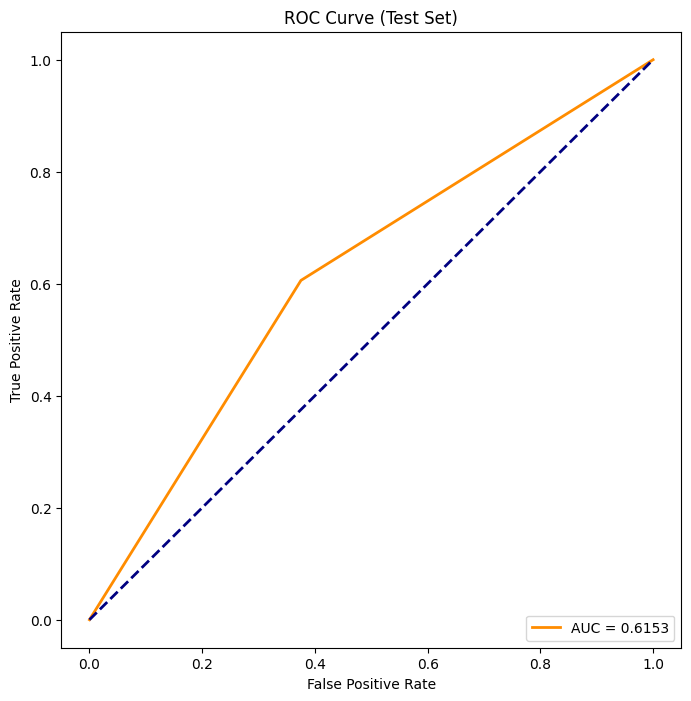

time: 358 ms (started: 2024-01-10 17:26:18 +00:00)


In [59]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_tensor.numpy(), predictions_test.numpy().flatten())
roc_auc_test = auc(fpr_test, tpr_test)

# ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()

# # AUC curve
# plt.figure(figsize=(8, 8))
# plt.plot(thresholds_test, 1 - fpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.4f}')
# plt.xlabel('Threshold')
# plt.ylabel('True Positive Rate')
# plt.title('AUC Curve (Test Set)')
# plt.legend(loc='lower right')
# plt.show()
